In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
def getHiddenUnit(db, cmd):
    nFeat = 0
    if db == "HouseA":
        nFeat = 15
    elif db == "CASAS":
        nFeat = 72
    elif db == "PAMAP":
        nFeat = 243
    elif db == "DSADS":
        nFeat = 405
    else:
        raise Exception("Unknown Dataset")
    
    step = nFeat//4
    return step * (cmd+1)

In [9]:
from scipy import stats
all_values = {}
for l in ["2-layer", "3-layer"]:
    all_values[l] = {}
    
    print("**", l,"**")
    for d in ["HouseA", "CASAS", "PAMAP", "DSADS"]:
        dataset = d
        folder = "../../Results/"+dataset+"/exp_offline_hidden/"+l+"/"

        raw = pd.read_csv(folder+"oversamplingresults.txt")
        raw.columns = [c.strip() for c in raw.columns]

        cmd = raw["cmd"].unique()
        task_order = raw["task_order"].unique()
        method = raw["method"].unique()

        print(d, "Working")
        overallAcc = {}
        for c in cmd:
            target = raw[raw["cmd"]==c]
            agg = target.groupby('task_order').agg({"no_of_test": ["sum"], "no_of_correct_prediction": ["sum"]})
            acc = agg["no_of_correct_prediction"]["sum"]/agg["no_of_test"]["sum"]

            val = (np.nanmean(acc), stats.sem(acc, nan_policy="omit"))
            overallAcc[c] = val

        print(d, "DONE")
        all_values[l][d] = overallAcc

** 2-layer **
HouseA Working
HouseA DONE
CASAS Working
CASAS DONE
PAMAP Working
PAMAP DONE
DSADS Working
DSADS DONE
** 3-layer **
HouseA Working
HouseA DONE
CASAS Working
CASAS DONE
PAMAP Working
PAMAP DONE
DSADS Working
DSADS DONE


# Continual learning 

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plotline(db, title="", ylim=[0, 1]):
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.rcParams.update({'font.size': 25})
    plt.rcParams['axes.titlepad'] = 10
    
    fig, ax = plt.subplots()
    patterns = [ "-s" , "-o" , "-x" , "-D" , "-+" , "-*", "-2" ]
    
    models = ["2-layer", "3-layer"]
    for conf in models:
        values = all_values[conf][db]
        cmd = values.keys()
        mval = [values[c][0] for c in cmd]
        merr = [values[c][1] for c in cmd]

        x = [getHiddenUnit(db, c) for c in cmd]
        print(mval)
        print(merr)
        ax.errorbar(x, mval, yerr=merr, fmt=patterns[0])

        mx = [values[c][0]+values[c][1] for c in cmd]
        mn = [values[c][0]-values[c][1] for c in cmd]

#     ax.fill_between(x, mn, mx, alpha=0.2)

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xlabel("Number of hidden units per layer")
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
    ax.set_xticklabels(x)

    ax.legend(models, prop={'size': 20}, loc=0)
    fig.tight_layout()
    fig.savefig(db+"-offline_hidden.pdf", bbox_inches='tight')

    plt.show()

[0.5237113402061856, 0.7773195876288659, 0.8278350515463917, 0.8381443298969072, 0.868041237113402, 0.8525773195876288, 0.8494845360824742, 0.8628865979381443]
[0.04731298633538342, 0.028882338679657314, 0.013044847351273063, 0.013835616590513676, 0.0029958068340485726, 0.005334767936859117, 0.004908198232675498, 0.007378319777863874]
[0.3463917525773196, 0.6865979381443299, 0.8288659793814432, 0.8494845360824742, 0.8597938144329896, 0.8484536082474227, 0.8577319587628865, 0.8690721649484535]
[0.02478995023624939, 0.031011722811487227, 0.020341784999242257, 0.007240999142854119, 0.004908198232675496, 0.005334767936859113, 0.0029958068340485765, 0.003453565505539827]


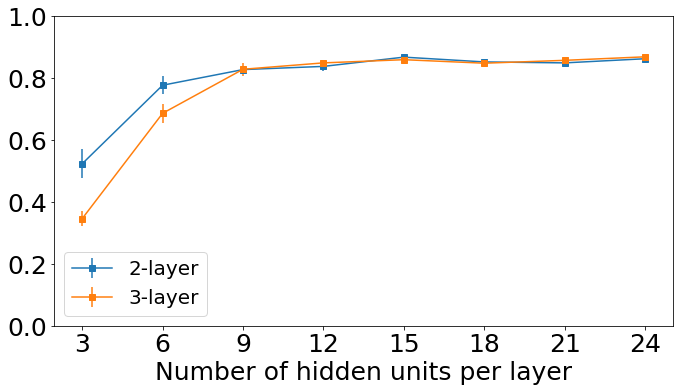

In [23]:
plotline("HouseA","")

[0.9221244419746226, 0.9146390941928313, 0.9322451421691209, 0.9288666851903308, 0.9353383902936001, 0.9187465499675836, 0.9264310734463276, 0.926389552653515]
[0.005163822620916583, 0.004095096039287835, 0.005140908200350901, 0.005031628092744124, 0.0050666048925333985, 0.006510067280980431, 0.0051657630859005665, 0.0038015087750955293]
[0.9091147540983606, 0.9224687227933686, 0.9248713716773178, 0.9197349171066037, 0.925679790682597, 0.9137267203852923, 0.9172819023802908, 0.9255394368806149]
[0.005337881646406217, 0.005384084160764689, 0.005128807555656712, 0.006897641322499268, 0.006314394955222992, 0.008745540010758546, 0.0058371928575881105, 0.003994887268620522]


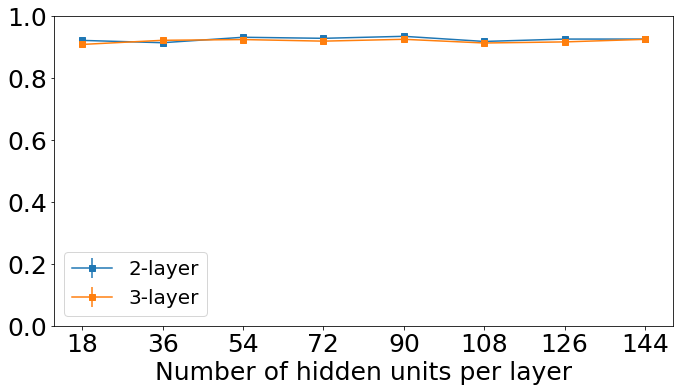

In [24]:
plotline("CASAS","")

[0.7809440052700922, 0.8046324110671937, 0.8218580368906455, 0.8244832015810278, 0.8220125164690382, 0.8169308300395256, 0.8349749670619235, 0.8453748353096179]
[0.005817968243853943, 0.007072956035871106, 0.00984639822428822, 0.007681197123685838, 0.009868886987959938, 0.016248982338728363, 0.010690021103574344, 0.009826885717310108]
[0.7463600131752306, 0.7738138998682477, 0.7861228590250329, 0.7744950592885375, 0.7831791831357049, 0.7653277338603426, 0.8029298418972333, 0.7985948616600791]
[0.007411886996573965, 0.007071330044303787, 0.004142978766875014, 0.008694808705454646, 0.007450148403856671, 0.007009425034508758, 0.005478417329135165, 0.010793119231417743]


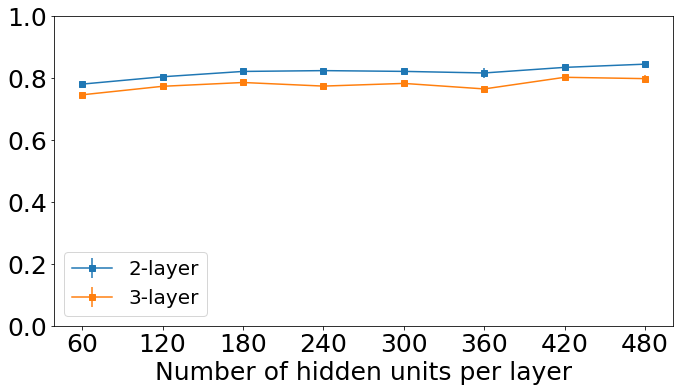

In [25]:
plotline("PAMAP","")

[0.7116186274509804, 0.7038632352941175, 0.7056338235294117, 0.7084034313725491, 0.7290176470588234, 0.7368691176470588, 0.7155161764705882, 0.7032220588235295]
[0.007857046585166704, 0.009931286479366462, 0.012831111989255451, 0.0170414916938828, 0.010643777911218033, 0.009726258761370874, 0.0104891836715972, 0.012041444560352672]
[0.6741401960784315, 0.6501490196078431, 0.678685294117647, 0.6517838235294118, 0.6371759803921568, 0.6299946078431373, 0.6137941176470588, 0.6702303921568629]
[0.011132693168846361, 0.016283964088539393, 0.009306783756392331, 0.012378330529158361, 0.025966297698309774, 0.022165227401581257, 0.025085424389668473, 0.00985073022267615]


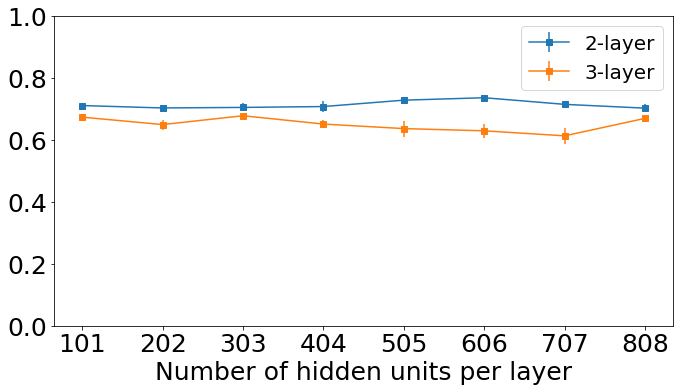

In [26]:
plotline("DSADS","")

In [ ]:
# Run command
# python .\run_exp_hidden_offline.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/oversampling --task-order=./Results/HouseA/task_orders.txt
# python .\run_merge.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/oversampling
# python .\run_exp_hidden_offline.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/oversampling --task-order=./Results/CASAS/task_orders.txt
# python .\run_merge.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/oversampling
# python .\run_exp_hidden_offline.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/oversampling --task-order=./Results/PAMAP/task_orders.txt
# python .\run_merge.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/oversampling
# python .\run_exp_hidden_offline.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/oversampling --task-order=./Results/DSADS/task_orders.txt
# python .\run_merge.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/oversampling

# python .\run_exp_hidden_offline.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/HouseA/task_orders.txt
# python .\run_exp_hidden_offline.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/CASAS/task_orders.txt
# python .\run_exp_hidden_offline.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/PAMAP/task_orders.txt
# python .\run_exp_hidden_offline.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/DSADS/task_orders.txt

# python .\run_merge.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/no-oversampling --no-oversampling
# python .\run_merge.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/no-oversampling --no-oversampling
# python .\run_merge.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/no-oversampling --no-oversampling
# python .\run_merge.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/no-oversampling --no-oversampling